In [279]:
import pandas as pd
import numpy as np

In [280]:
df=pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [282]:
df.shape


(1259, 27)

In [283]:
df = df.drop(columns=['Country', 'Timestamp', 'comments', 'state'])

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [285]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [286]:
df['self_employed'].fillna('No', inplace=True)
df['work_interfere'].fillna('No', inplace=True)

In [287]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

<Axes: >

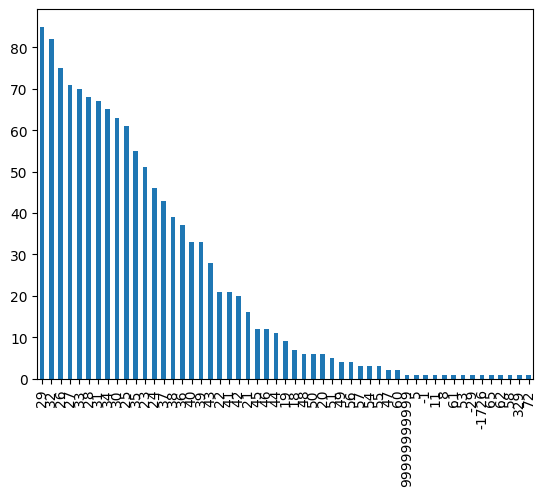

In [288]:
df['Age'].value_counts().plot(kind='bar')

In [289]:
df = df[(df['Age'] <= 60) & (df['Age'] >= 18)]

<Axes: >

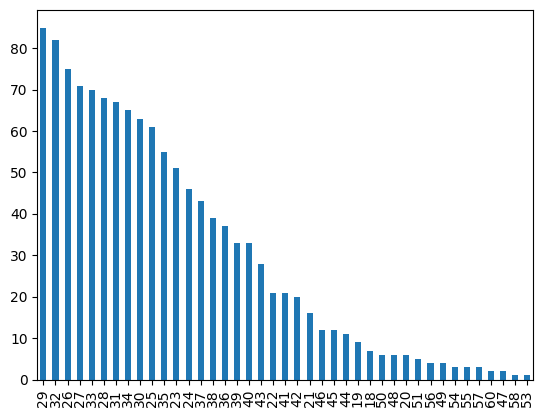

In [290]:
df['Age'].value_counts().plot(kind='bar')


In [291]:
df['Gender'].value_counts()

Male                                              611
male                                              203
Female                                            120
M                                                 115
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [292]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Mal', 'Make', 'Cis Male', 'cis male', 'Cis Man', 'Man', 'Malr', 'Male (CIS)', 'Mail', 'maile', 'msle', 'Malr', 'Make' ], 'Male', inplace=True)

In [293]:
df['Gender'].replace(['Female', 'female', 'femail', 'F', 'f', 'Woman', 'Female ', 'female', 'femail' 'Cis Female', 'cis-female/femme', 'Femake', 'Cis Female' 'Female (cis)', 'woman'], 'Female', inplace =True)

In [294]:
df['Gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous', 'Female  (trans)' 'Agender', 'Genderqueer',  'Neuter', 'Nah', 'ostensibly male, unsure what that really means', 'femail    ', 'Male-ish', 'something kinda male?', 'Enby', 'Guy (-ish) ^_^', 'Trans woman'], 'Non-Binary', inplace=True)

In [295]:
df['Gender'].value_counts()

Male            982
Female          244
Non-Binary       18
Cis Female        1
Agender           1
Female (cis)      1
Name: Gender, dtype: int64

In [296]:
df['treatment'].value_counts()

Yes    630
No     617
Name: treatment, dtype: int64

In [297]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [298]:
X_values = df.drop('treatment', axis =1)

In [299]:
Y_values = df['treatment']

In [300]:
le =LabelEncoder()
ct= ColumnTransformer([('oe', OrdinalEncoder(), ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence'])], remainder='passthrough')

In [301]:
xval= ct.fit_transform(X_values)

In [302]:
le = LabelEncoder()
yval= le.fit_transform(Y_values)

In [303]:
gender_mapping = {'Male': 1, 'Female': 2, 'Non-Binary': 0}
df['Gender'] = df['Gender'].map(gender_mapping)

In [304]:
import joblib
joblib.dump(ct, 'feature_values')

['feature_values']

In [305]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xval, yval,test_size=0.2, random_state=20)

In [306]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((997, 22), (250, 22), (997,), (250,))

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Corrected import statement
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc


In [308]:
model_dict = {}

model_dict['Logistic regression'] = LogisticRegression(solver='liblinear', random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)

In [309]:
def model_test(x_train, x_test, y_train, y_test, model, model_name):
  model.fit(x_train, y_train)
  y_pred =  model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f' ---------- {model_name} gives {accuracy*100} % accuracy ---------- ')
  print()

In [310]:
for model_name,model in model_dict.items():
  model_test(x_train, x_test, y_train, y_test, model, model_name)

 ---------- Logistic regression gives 80.80000000000001 % accuracy ---------- 

 ---------- KNN Classifier gives 77.2 % accuracy ---------- 

 ---------- Decision Tree Classifier gives 78.4 % accuracy ---------- 

 ---------- Random Forest Classifier gives 84.8 % accuracy ---------- 

 ---------- AdaBoost Classifier gives 84.39999999999999 % accuracy ---------- 

 ---------- Gradient Boosting Classifier gives 84.39999999999999 % accuracy ---------- 

 ---------- XGB Classifier gives 83.6 % accuracy ---------- 



In [314]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train and y_train for training and x_test and y_test for testing
abc = AdaBoostClassifier(random_state=99)
abc.fit(x_train, y_train)
pred_abc = abc.predict(x_test)
print(f'Accuracy of AdaBoost = {accuracy_score(y_test, pred_abc) * 100}%', )


Accuracy of AdaBoost = 84.39999999999999%


In [315]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

params_abc = {
    'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
    'learning_rate': [(0.97 + x/100) for x in range(0, 8)],
}

abc_random = RandomizedSearchCV(estimator=abc, param_distributions=params_abc, n_iter=50, cv=5, n_jobs=-1, random_state=49)


In [316]:
abc_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [317]:
abc_random.best_params_

{'n_estimators': 4, 'learning_rate': 1.0}

In [319]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
abc_tuned = AdaBoostClassifier(random_state=49, n_estimators=11, learning_rate=1.02)
abc_tuned.fit(x_train, y_train)
pred_abc_tuned = abc_tuned.predict(x_test)
print('Accuracy of AdaBoost (tuned) =', accuracy_score(y_test, pred_abc_tuned))


Accuracy of AdaBoost (tuned) = 0.868


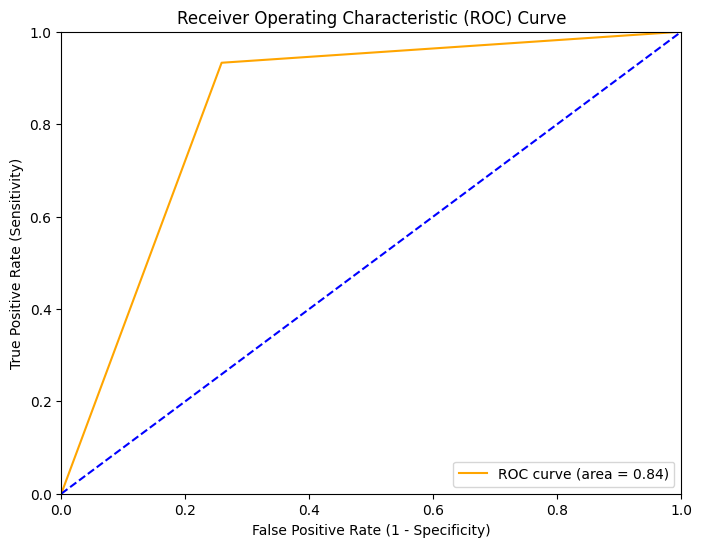

In [320]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = auc(fpr_abc, tpr_abc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_abc))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()


In [321]:
print(classification_report(y_test, pred_abc))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       116
           1       0.81      0.93      0.87       134

    accuracy                           0.84       250
   macro avg       0.86      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250



In [323]:
import pickle
pickle.dump(abc_tuned, open('model_pkl', 'wb'))